In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [50]:
df1 = pd.read_csv('Customers.csv', header = 0)
df2 = pd.read_csv('Products.csv', header = 0)
df3 = pd.read_csv('Transactions.csv', header = 0)


In [51]:
print(df1.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [52]:
print(df1.shape)
print(df2.shape)
print(df3.shape)


(200, 4)
(100, 4)
(1000, 7)


In [53]:
print("Missing values in each column for df1:\n", df1.isnull().sum())
print("Missing values in each column for df2:\n", df2.isnull().sum())
print("Missing values in each column for df3:\n", df3.isnull().sum())

Missing values in each column for df1:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in each column for df2:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in each column for df3:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB



CustomerID Analysis:
Total CustomerID values: 200
Unique CustomerID values: 200
All CustomerIDs are unique.

CustomerName Analysis:
Total unique CustomerNames: 200

Region Analysis:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


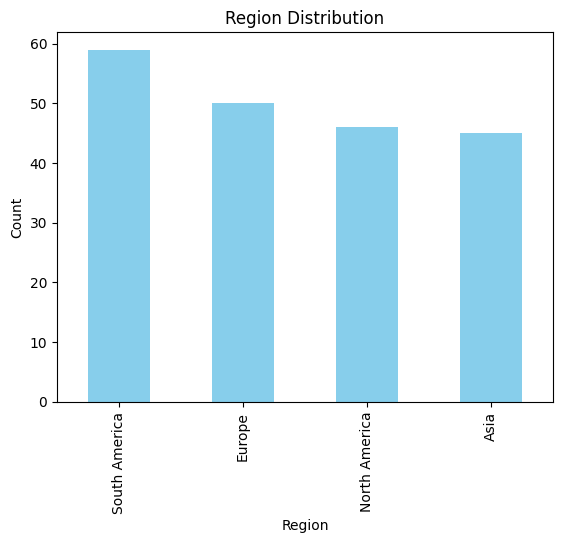

In [55]:
# 1. Analyze CustomerID
print("\nCustomerID Analysis:")
print(f"Total CustomerID values: {df1['CustomerID'].count()}")
print(f"Unique CustomerID values: {df1['CustomerID'].nunique()}")
if df1['CustomerID'].nunique() == df1['CustomerID'].count():
    print("All CustomerIDs are unique.")
else:
    print("There are duplicate CustomerIDs.")

# 2. Analyze CustomerName
print("\nCustomerName Analysis:")
print(f"Total unique CustomerNames: {df1['CustomerName'].nunique()}")

# 3. Analyze Region
print("\nRegion Analysis:")
print(df1['Region'].value_counts())
df1['Region'].value_counts().plot(kind='bar', title='Region Distribution', color='skyblue')
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


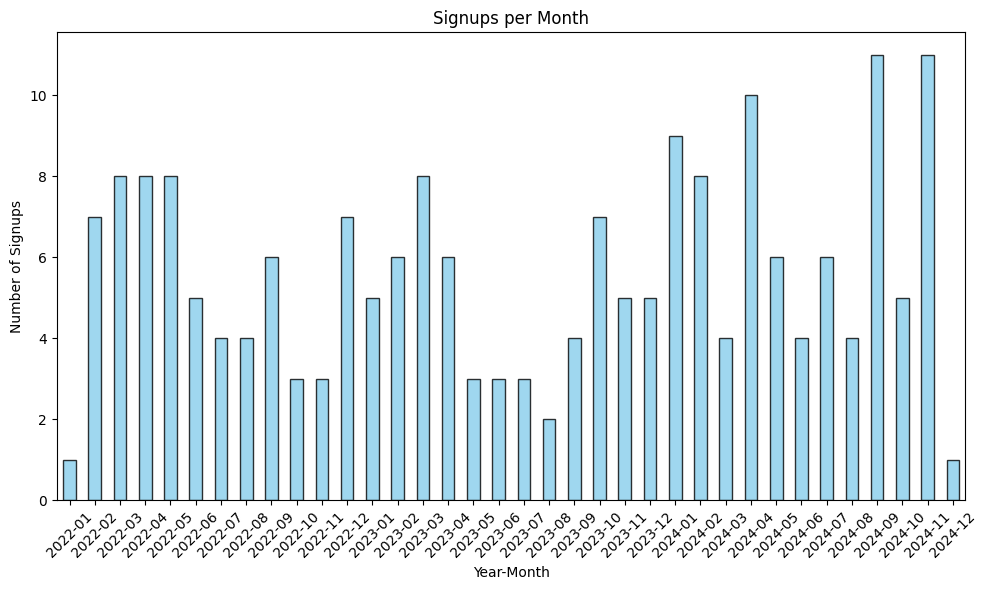

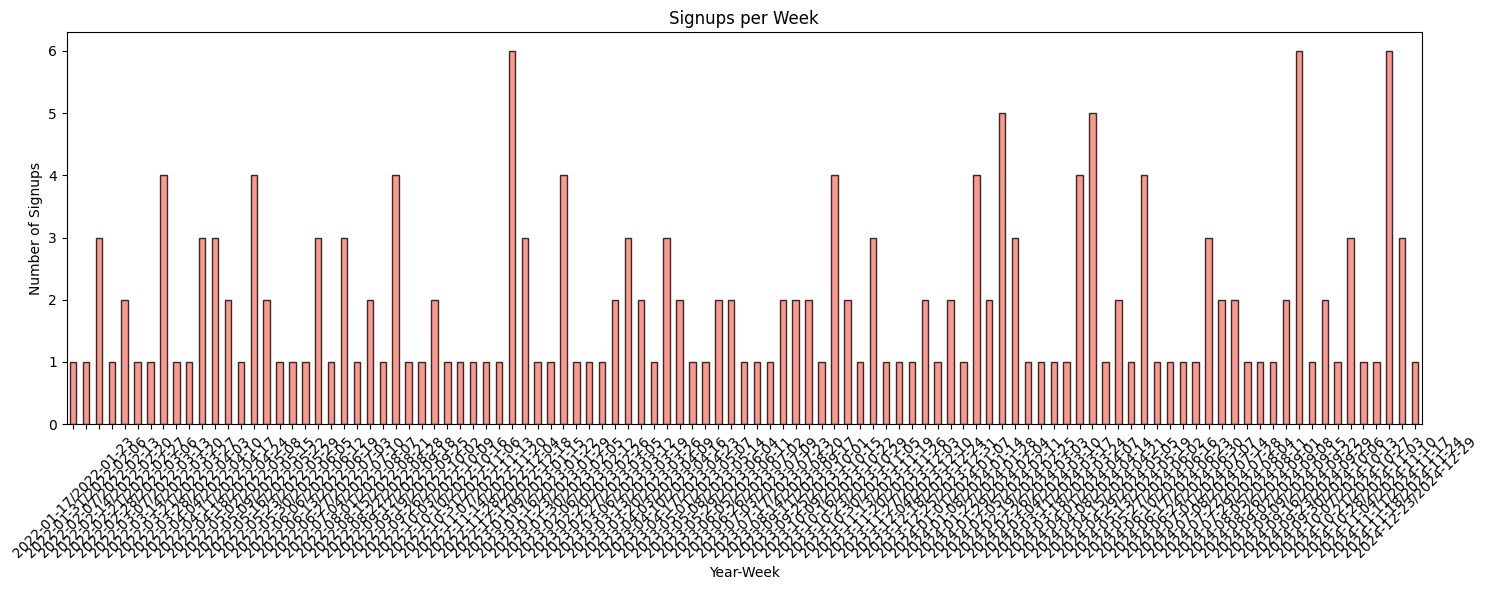

C:\Users\mitta\AppData\Local\Temp\ipykernel_23856\1549011367.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_signups.index, y=daywise_signups.values, palette='viridis')


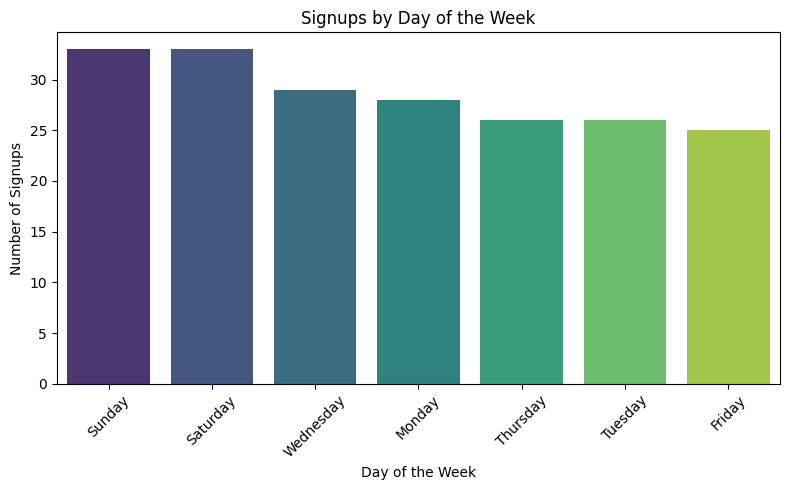

In [56]:
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

# Group by month and count signups
df1['YearMonth'] = df1['SignupDate'].dt.to_period('M')  # Extract Year-Month
monthly_signups = df1.groupby('YearMonth').size()

# Plot monthly signups
plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
plt.title("Signups per Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by week and count signups
df1['YearWeek'] = df1['SignupDate'].dt.to_period('W')  # Extract Year-Week
weekly_signups = df1.groupby('YearWeek').size()

# Plot weekly signups
plt.figure(figsize=(15, 6))
weekly_signups.plot(kind='bar', color='salmon', alpha=0.8, edgecolor='black')
plt.title("Signups per Week")
plt.xlabel("Year-Week")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Analysis (Optional): Distribution by Day of Week
df1['DayOfWeek'] = df1['SignupDate'].dt.day_name()
daywise_signups = df1['DayOfWeek'].value_counts()

# Plot day-wise distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=daywise_signups.index, y=daywise_signups.values, palette='viridis')
plt.title("Signups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


<Figure size 1000x600 with 0 Axes>

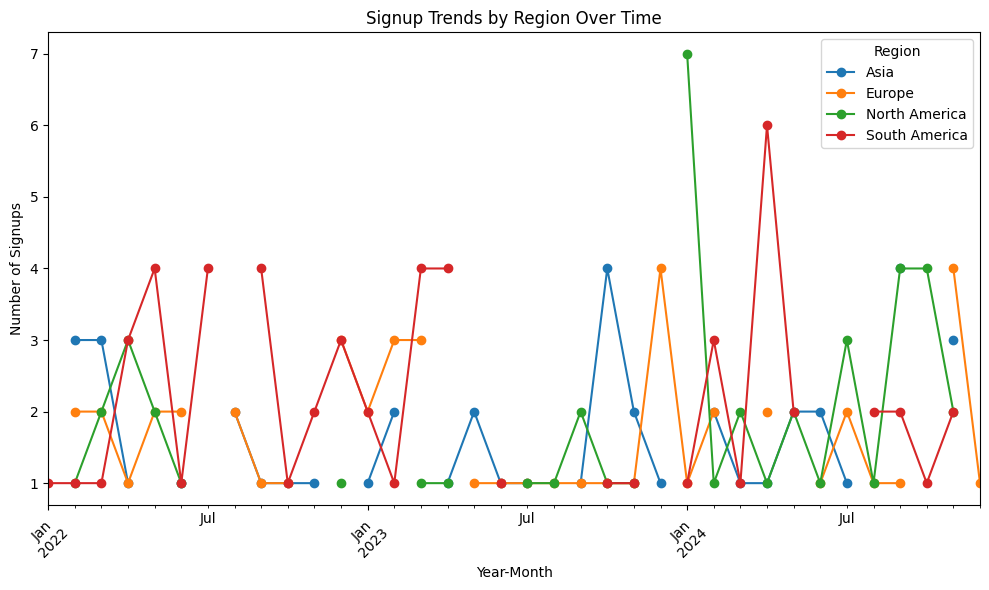

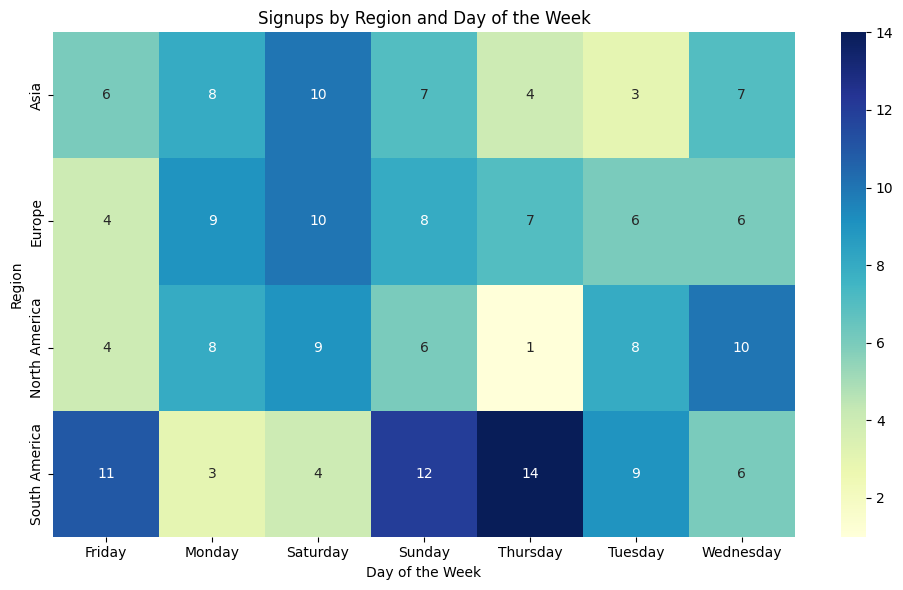


Duplicate Check:
No duplicate rows detected with matching CustomerID and CustomerName.


In [59]:
# Convert SignupDate to datetime
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])
df1['DayOfWeek'] = df1['SignupDate'].dt.day_name()  # Extract day of the week
1

# 1. Signup Date Trends by Region
df1['YearMonth'] = df1['SignupDate'].dt.to_period('M')  # Extract Year-Month
region_trends = df1.groupby(['YearMonth', 'Region']).size().unstack()

plt.figure(figsize=(10, 6))
region_trends.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Signup Trends by Region Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Region vs. Day of the Week (Heatmap)
heatmap_data = df1.groupby(['Region', 'DayOfWeek']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', cbar=True)
plt.title("Signups by Region and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# 4. CustomerID vs. CustomerName (Duplicate Check)
duplicates = df1.duplicated(subset=['CustomerName', 'CustomerID']).sum()

print("\nDuplicate Check:")
if duplicates > 0:
    print(f"There are {duplicates} duplicate rows with matching CustomerID and CustomerName.")
else:
    print("No duplicate rows detected with matching CustomerID and CustomerName.")


Descriptive Statistics for Numerical Columns:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


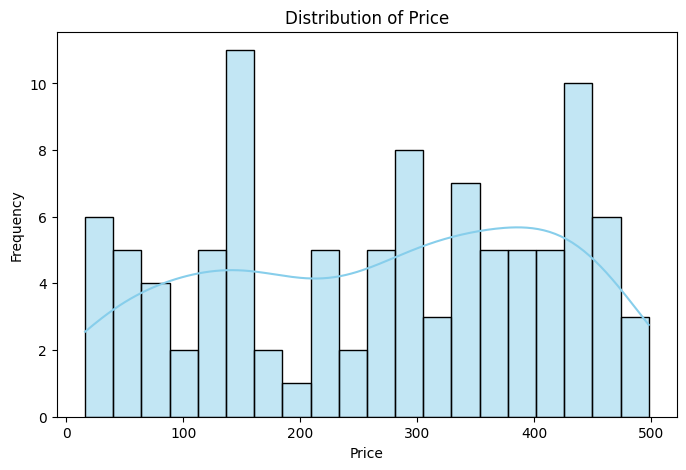

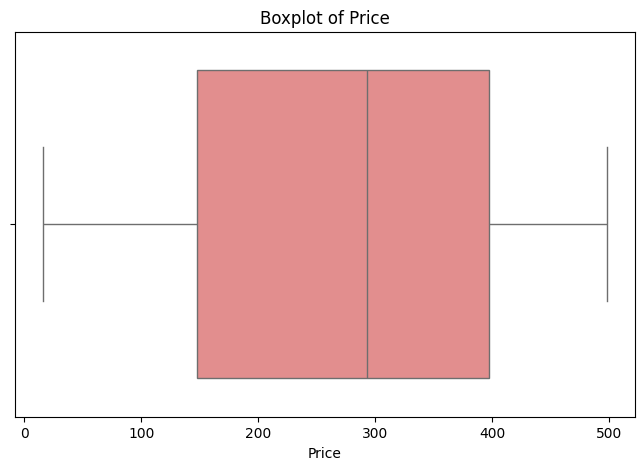

In [60]:
# Display summary statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df2.describe())

# # Count unique values for categorical columns
# categorical_columns = ['ProductID', 'ProductName', 'Category']
# for col in categorical_columns:
#     print(f"\nValue Counts for {col}:")
#     print(df2[col].value_counts())

# Univariate Analysis for Numerical Columns
plt.figure(figsize=(8, 5))
sns.histplot(df2['Price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for detecting outliers in Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['Price'], color='lightcoral')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()



C:\Users\mitta\AppData\Local\Temp\ipykernel_23856\1055150517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x="Category", y="Price", palette="muted")


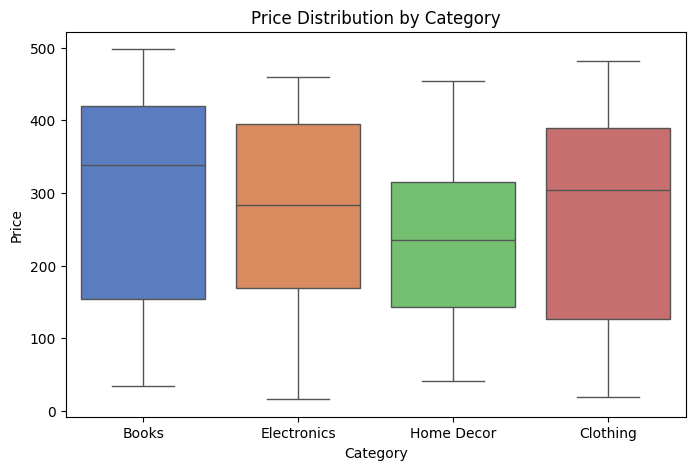

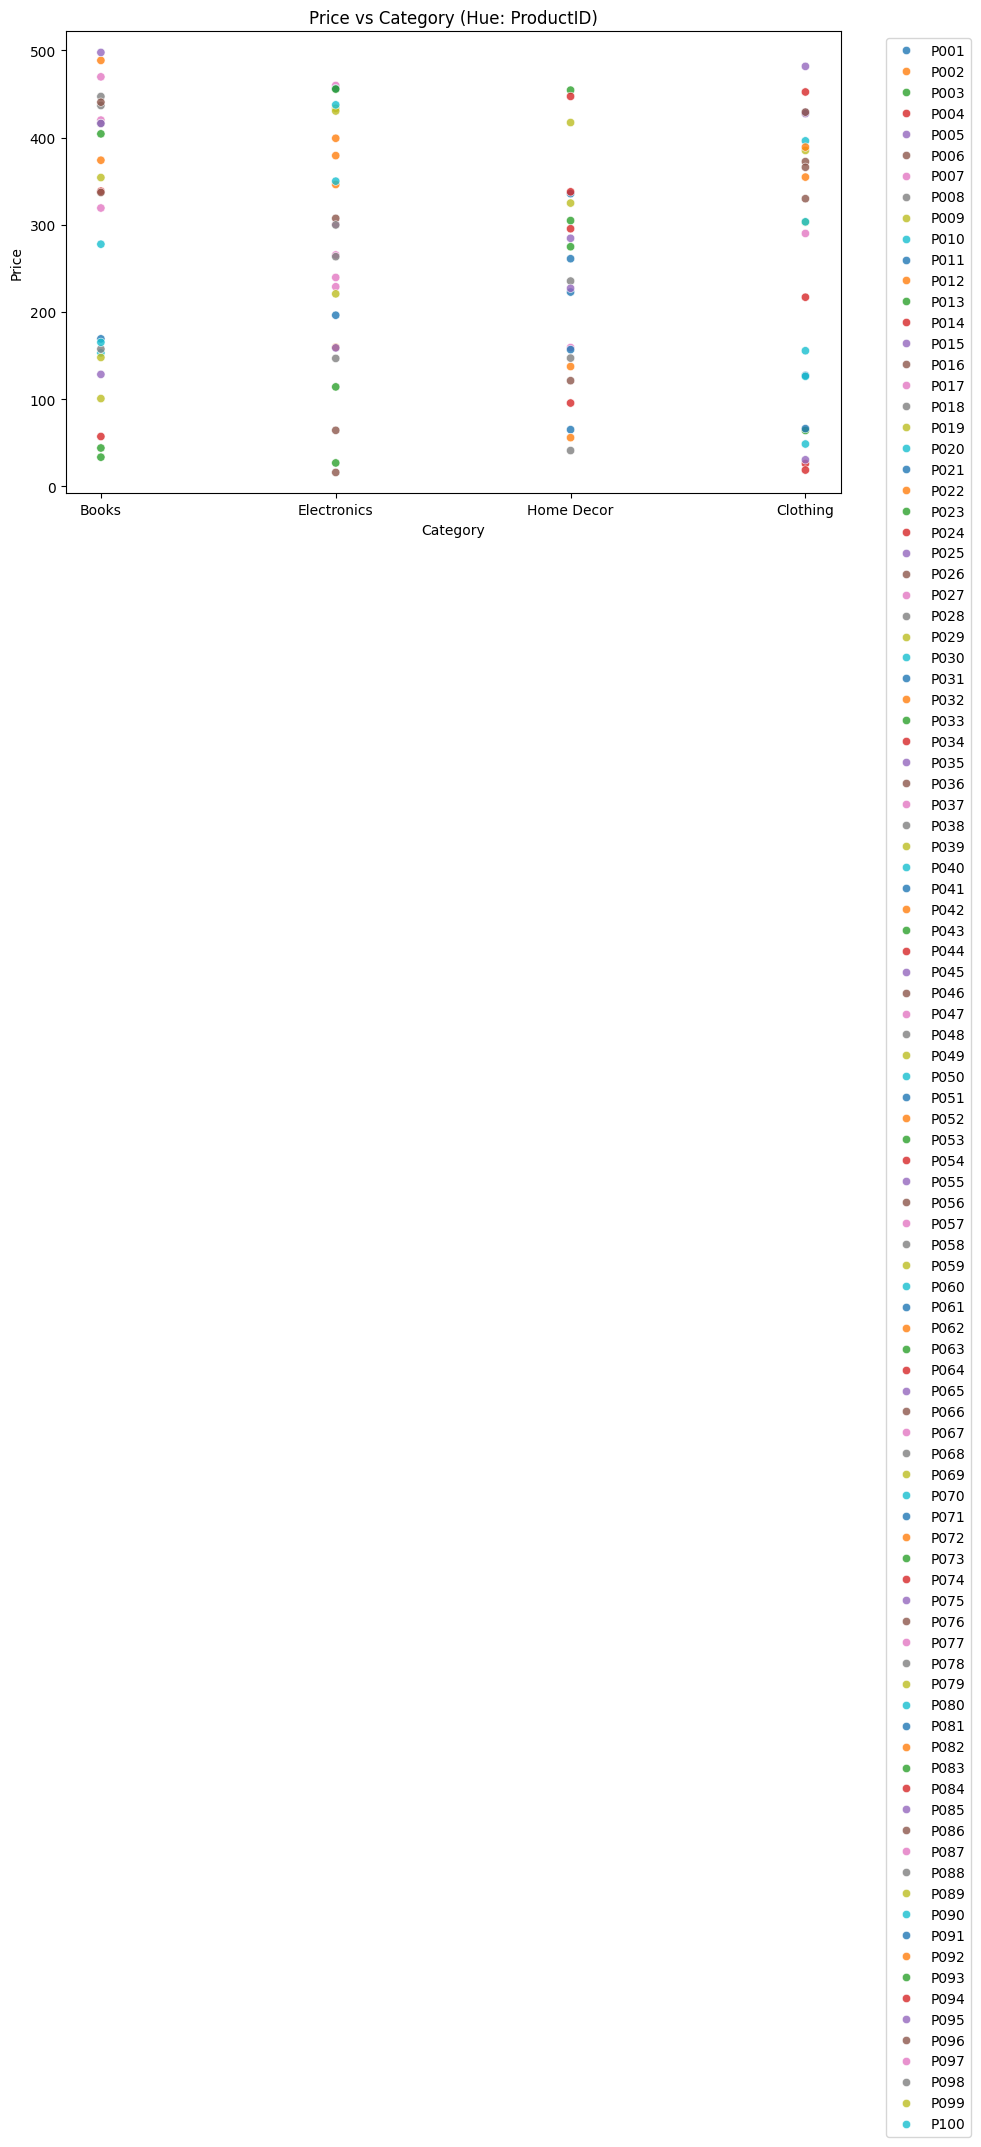

In [61]:

# Boxplot: Price Distribution Across Categories
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x="Category", y="Price", palette="muted")
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()


# Scatterplot: Price vs Category with Hue as ProductID
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x="Category", y="Price", hue="ProductID", palette="tab10", alpha=0.8)
plt.title("Price vs Category (Hue: ProductID)")
plt.xlabel("Category")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB



Descriptive Statistics for Numerical Columns:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


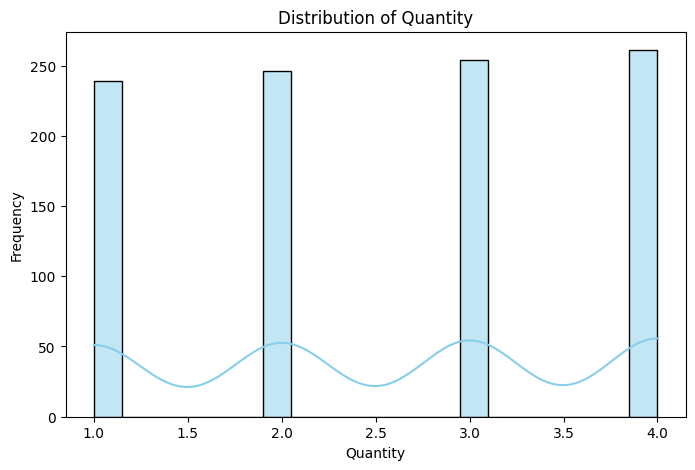

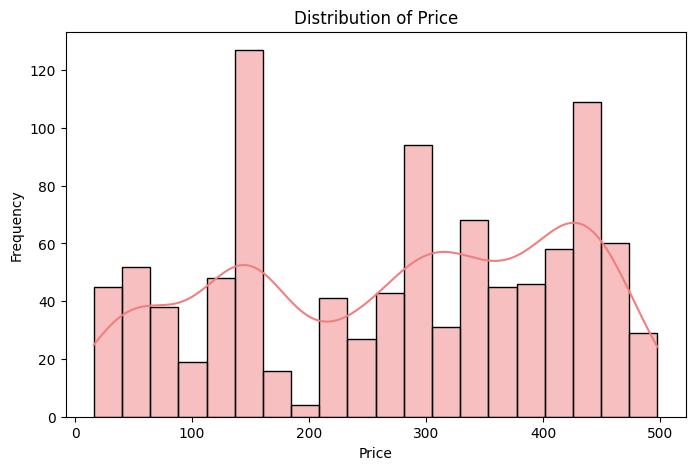

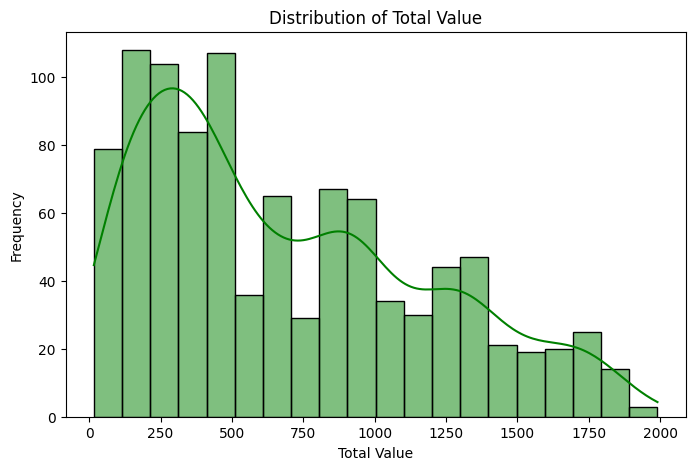

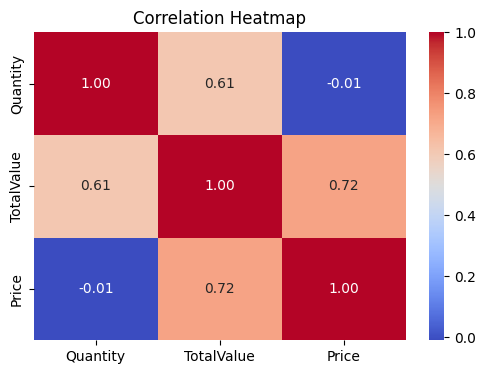

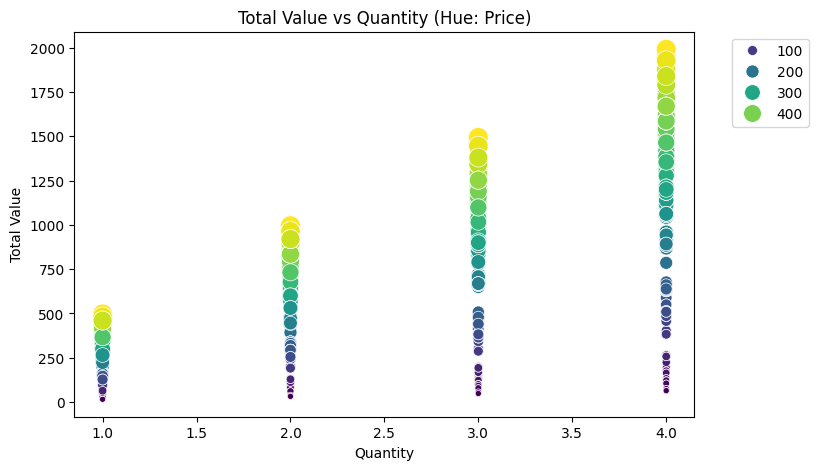

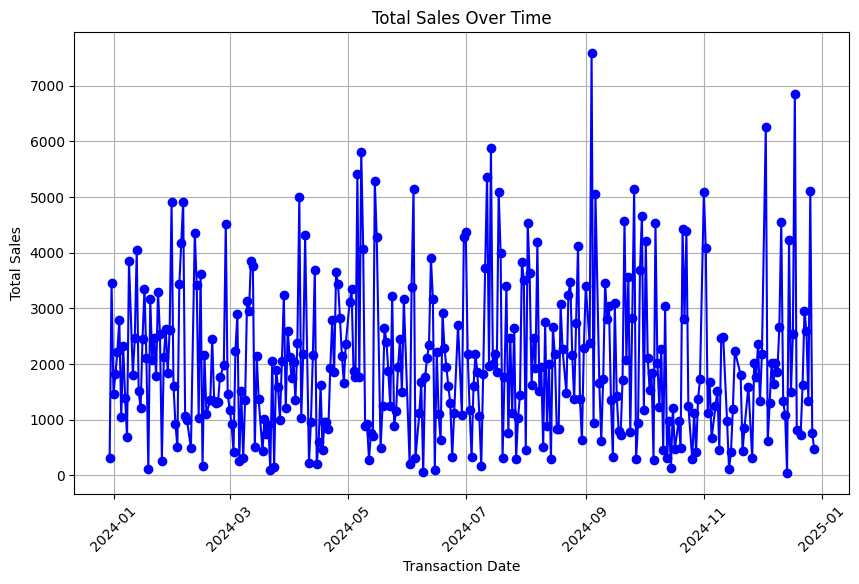

In [63]:
# Univariate Analysis
print("\nDescriptive Statistics for Numerical Columns:")
print(df3[['Quantity', 'TotalValue', 'Price']].describe())

# Univariate Analysis Visualizations
# Quantity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df3['Quantity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df3['Price'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Total Value Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df3['TotalValue'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(6, 4))
correlation_matrix = df3[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# TotalValue vs Quantity Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='Quantity', y='TotalValue', hue='Price', palette='viridis', size='Price', sizes=(20, 200))
plt.title('Total Value vs Quantity (Hue: Price)')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# # Boxplot of Price by ProductID (Top 10 products by frequency)
# top_10_products = df3['ProductID'].value_counts().head(10).index
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df3[df3['ProductID'].isin(top_10_products)], x='ProductID', y='Price', palette='pastel')
# plt.title('Price Distribution by ProductID (Top 10 Products)')
# plt.xlabel('ProductID')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.show()

df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

# # Time Series Analysis: Total Value Over Time
plt.figure(figsize=(10, 6))
daily_sales = df3.groupby(df3['TransactionDate'].dt.date)['TotalValue'].sum()
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Final Merged Data:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region SignupDate  \
0        300.68   300.68        Andrea 

C:\Users\mitta\AppData\Local\Temp\ipykernel_23856\2483163095.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_summary, x='ProductName', y='Quantity', palette='muted')


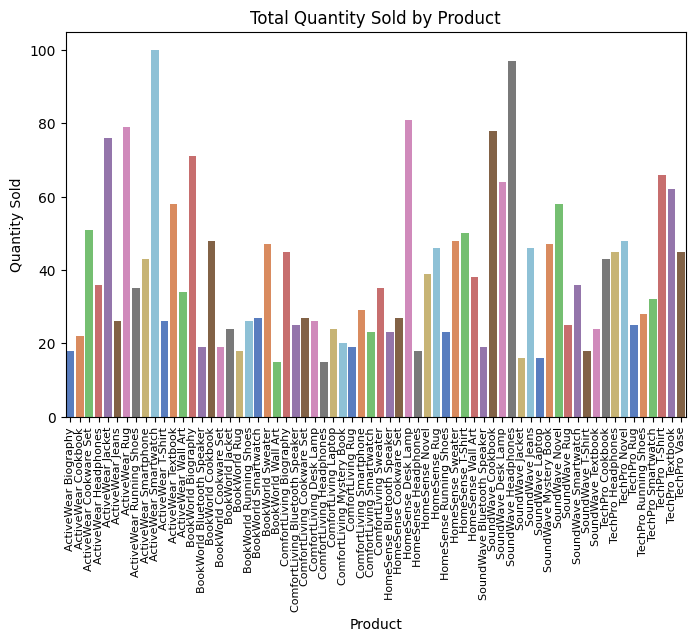

In [64]:
df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

# Merge df1 (Customer data) with df3 (Transaction data) on CustomerID
merged_data = pd.merge(df3, df1, on='CustomerID', how='inner')

# Merge df2 (Product data) with the merged data on ProductID
final_data = pd.merge(merged_data, df2, on='ProductID', how='inner')

# Display the final dataset
print("\nFinal Merged Data:")
print(final_data)

# Analyze the final dataset
# 1. Total Quantity and Value per Customer
customer_summary = final_data.groupby('CustomerName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

print("\nCustomer Summary:")
print(customer_summary)

# 2. Total Quantity and Value per Product
product_summary = final_data.groupby('ProductName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

print("\nProduct Summary:")
print(product_summary)

# plt.figure(figsize=(8, 5))
# sns.barplot(
#     data=customer_summary.sort_values(by='TotalValue', ascending=True),  # Sort for better organization
#     x='TotalValue',
#     y='CustomerName',
#     palette='coolwarm'
# )
# plt.title('Total Sales by Customer', fontsize=14, fontweight='bold')
# plt.xlabel('Total Sales', fontsize=12)
# plt.ylabel('Customer', fontsize=12)
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# Visualize Total Quantity by Product
plt.figure(figsize=(8, 5))
sns.barplot(data=product_summary, x='ProductName', y='Quantity', palette='muted')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90, fontsize=8)

plt.show()